# ML HW2
### 106598018 萬俊瑋
In the following problems, you can use existing tools to find eigenvalues and eigenvectors of matrices. For pedagogical reasons, you need to complete other parts of the programs by yourself, but not calling existing libraries.

**1. In the lecture, we mentioned that the term λ ∑ wi2i is a regularization term.**  
i. Use your own words to explain why it is so.  
ii. If we implement two regression programs, one using λ∑iwi^2 and the other one using λ∑iwi^10, which one do you expect has lower bias? How about variance? Why? Assuming that we use the same λ for both programs.  
> i. 假設我迴歸出來的方程式次數很高，那λ∑iwi^n這一項就會變得很大，從而讓我的loss function 數值變高，我們迴歸的目的就是找出一條loss function數值低的方程式，因此增加這一項可以有效的抑制迴歸出的方程式次數過高；當w的次數比較高時，抑制的效果會更明顯。  
> ii. w項為2次時有比較低的 bias，如下圖，w次數比較小時，容易得到一個高次的迴歸線，他對於數據擬合的非常好，loss function數值趨近於0，但是對於未知數據預測時，他的預測通常不是那麼準。
<img src="https://github.com/wei840222/ML-HW/blob/master/images/01.png" width="50" height="50" />
> w項為10次時有比較低的 variance，如下圖，w次數比較大時，容易得到一個低次的迴歸線，他對於數據擬合的不是非常好，可能某幾個點會有error值，但是他得出的迴歸線通常代表已知及未知數具分布情形，對於未知數據預測時結果較好。
> ![](https://github.com/wei840222/ML-HW/blob/master/images/02.png)


**2. We mentioned that the covariance matrix may be ill-conditioned. Find the (sample) covariance matrices for the three classes of the Iris dataset and compute the condition numbers for the covariance matrices. For simplicity, use the following as the condition number: κ(A) = | λ max/λ min |, where λ max and λ min are the largest and smallest eigenvalues of matrix A.**

Load dataset

In [1]:
import pandas as pd

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
X, y = iris.iloc[:, :4].values, iris[4].values

Covariance Matrix & Condition Number

In [2]:
import numpy as np

def covarianceMatrix_1D(X):
    X = np.mat(X)
    dim = X.shape[1]
    x_E = np.mean(X, axis=0)
    cov_mat = np.zeros([dim, dim])
    for x in X:
        var_vec = x-x_E
        cov_mat+=np.transpose(var_vec)*var_vec
    cov_mat/=len(X)
    return cov_mat

def conditionNumber(cov_mat):
    eig = np.linalg.eigvals(cov_mat)
    con_num = np.abs(np.max(eig)/np.min(eig))
    return con_num

def _printDataInfo_iris(X):
    for i in range(3):
        cov_mat = covarianceMatrix_1D(X[i*50:i*50+50])
        con_num = conditionNumber(cov_mat)
        print(y[i*50] + ':')
        print('Covariance Matrix:')
        print(cov_mat)
        print('Condition Number:')
        print(con_num)
        print()

# print data info after PCA
_printDataInfo_iris(X)

Iris-setosa:
Covariance Matrix:
[[0.121764 0.098292 0.015816 0.010336]
 [0.098292 0.142276 0.011448 0.011208]
 [0.015816 0.011448 0.029504 0.005584]
 [0.010336 0.011208 0.005584 0.011264]]
Condition Number:
25.373917566328824

Iris-versicolor:
Covariance Matrix:
[[0.261104 0.08348  0.17924  0.054664]
 [0.08348  0.0965   0.081    0.04038 ]
 [0.17924  0.081    0.2164   0.07164 ]
 [0.054664 0.04038  0.07164  0.038324]]
Condition Number:
49.832049727403785

Iris-virginica:
Covariance Matrix:
[[0.396256 0.091888 0.297224 0.048112]
 [0.091888 0.101924 0.069952 0.046676]
 [0.297224 0.069952 0.298496 0.047848]
 [0.048112 0.046676 0.047848 0.073924]]
Condition Number:
20.290018691247386



**3. In this problem, you are asked to use the Iris dataset to perform PCA dimensionality reduction before classification. Randomly draw 35 samples in each class to find the vectors w (j) for the largest two principal components. Recall that PCA is unsupervised; therefore, you need to use 35×3 = 105 data points to find the parameters of the PCA. Implement the 3-NN classifier to test the rest 15 samples in each class and record the accuracy. Repeat the drawing and the k-NN classification 10 times and compute the average accuracy and variance. For simplicity, use the Euclidean distance in the k-NN computation.**

PCA dimensionality reduction & k-NN

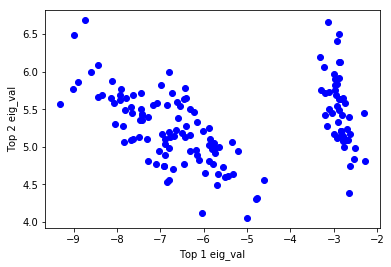

Iris-setosa:
Covariance Matrix:
[[ 0.04777048 -0.05590782]
 [-0.05590782  0.21472356]]
Condition Number:
7.52861622845975

Iris-versicolor:
Covariance Matrix:
[[ 0.34899363 -0.19443157]
 [-0.19443157  0.18078976]]
Condition Number:
8.986431653681425

Iris-virginica:
Covariance Matrix:
[[ 0.48896484 -0.26977165]
 [-0.26977165  0.22766092]]
Condition Number:
11.235679177140494

3-NN result
average acc:0.9755555555555556
varance of acc:0.00034074074074074


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def pca_fit_1D(X, n):
    cov_mat = covarianceMatrix_1D(X)
    eig_vals, eig_vecs = np.linalg.eigh(cov_mat)
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
    eig_pairs.sort(reverse = True)
    W = np.mat([pair[1] for pair in eig_pairs[:n]])
    return np.transpose(W)

def transform_1D(X, W):
    return np.dot(X, W)

def _plotData_iris_2D(X):
    plt.plot(X[:, 0], X[:, 1], 'ob')
    plt.xlabel('Top 1 eig_val') 
    plt.ylabel('Top 2 eig_val')
    plt.show()

# print data info after PCA
X_pca = transform_1D(X, pca_fit_1D(X, 2))
_plotData_iris_2D(X_pca)
_printDataInfo_iris(X_pca)

acc = list()
for i in range(10):
    # randomly split data for 3 class of 0.3 test size
    seed = random.randint(0,100)
    X_train, X_test, y_train, y_test = [], [], [], []
    for j in range(3):
        X_train_sub, X_test_sub, y_train_sub, y_test_sub = \
        train_test_split(X[j*50:j*50+50], y[j*50:j*50+50], test_size = 0.3, random_state=random.randint(0,100))
        X_train.extend(X_train_sub)
        X_test.extend(X_test_sub)
        y_train.extend(y_train_sub)
        y_test.extend(y_test_sub)

    # PCA transform
    W = pca_fit_1D(X_train, 2)
    X_train_pca = transform_1D(X_train, W)
    X_test_pca = transform_1D(X_test, W)

    # 3-NN
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    
print('3-NN result')
print('average acc:' + str(np.mean(acc)))
print('varance of acc:' + str(np.var(acc)))

**4. Following the general steps of problem 2, but use the FA approach for dimensionality reduction. For simplicity, you may assume Y = 0 and use the LS solutions.**

FA dimensionality reduction & Covariance Matrix & Condition Number

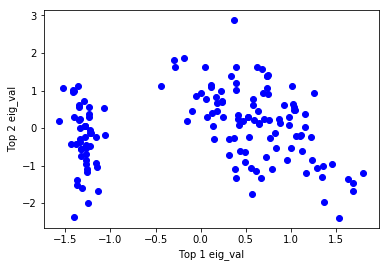

Iris-setosa:
Covariance Matrix:
[[ 0.00976233 -0.01880067]
 [-0.01880067  0.65293936]]
Condition Number:
70.92930008580237

Iris-versicolor:
Covariance Matrix:
[[ 0.07409031 -0.14188028]
 [-0.14188028  0.79397853]]
Condition Number:
17.415953126431678

Iris-virginica:
Covariance Matrix:
[[ 0.10367777 -0.25315414]
 [-0.25315414  1.07946917]]
Condition Number:
27.23023313623995



In [4]:
from sklearn.decomposition import FactorAnalysis
fa=FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)

# print data info after FA
_plotData_iris_2D(X_fa)
_printDataInfo_iris(X_fa)

**5. Repeat problem 2 by using LDA as the reduction method. Remember to compute the parameters for each class in order to use LDA.**

LDA dimensionality reduction & Covariance Matrix & Condition Number

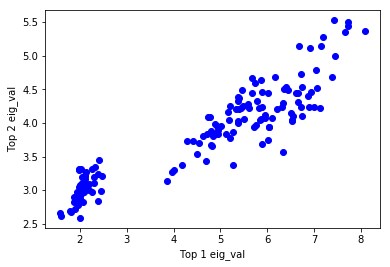

Iris-setosa:
Covariance Matrix:
[[0.03431717 0.02283724]
 [0.02283724 0.04087902]]
Condition Number:
4.1765262101506515

Iris-versicolor:
Covariance Matrix:
[[0.26993309 0.16133435]
 [0.16133435 0.1246852 ]]
Condition Number:
18.36056364090784

Iris-virginica:
Covariance Matrix:
[[0.35574746 0.2468533 ]
 [0.2468533  0.26328048]]
Condition Number:
9.605527986270816



In [5]:
def lda_fit_1D(X, y, n):
    X = np.mat(X)
    dim = X.shape[1]
    mean_vecs = list()
    for label in set(y):
        mean_vecs.append(np.mean(X[y==label], axis=0))
    X_mean = np.mean(X, axis=0)
    S_w = np.zeros([dim, dim])
    S_b = np.zeros([dim, dim])
    for label, mean_vec in zip(set(y), mean_vecs):
        S_i = covarianceMatrix_1D(X[y==label])
        S_w += S_i
        S_b += len(X[y==label])*np.transpose(mean_vec-X_mean)*(mean_vec-X_mean)

    eig_vals, eig_vecs = np.linalg.eigh(np.dot(np.linalg.inv(S_w), S_b))
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
    eig_pairs.sort(reverse = True)
    W = np.mat([pair[1] for pair in eig_pairs[:n]])
    return np.transpose(W)
    
X_lda = transform_1D(X, lda_fit_1D(X, y, 2))

# print data info after LDA
_plotData_iris_2D(X_lda)
_printDataInfo_iris(X_lda)